# PART A: BMI ANALYSIS

In [936]:
# Access the uploaded file
with open("hw.txt", 'r') as f:
    data = f.read()
    print(data)

180
180
170
200
170
180
140
190
180
130
150
220
185
110
165
300
150
86
140
300
155
150
182
178
170
150



In [937]:
def read_pairs(path: str):
    with open(path, "r", encoding="utf-8") as f:
        numbers = [float(line.strip()) for line in f if line.strip()]

    pairs = []
    for i in range(0, len(numbers), 2):
        cm = numbers[i]
        lb = numbers[i + 1]
        pairs.append(( cm, lb))
    return pairs

# Get a list of (cm, lb) pairs from the file
pairs = read_pairs('hw.txt')

# Loop through each pair and print it with labels
for cm, lb in pairs:
    print(f'cm: {cm}, lb: {lb}')

cm: 180.0, lb: 180.0
cm: 170.0, lb: 200.0
cm: 170.0, lb: 180.0
cm: 140.0, lb: 190.0
cm: 180.0, lb: 130.0
cm: 150.0, lb: 220.0
cm: 185.0, lb: 110.0
cm: 165.0, lb: 300.0
cm: 150.0, lb: 86.0
cm: 140.0, lb: 300.0
cm: 155.0, lb: 150.0
cm: 182.0, lb: 178.0
cm: 170.0, lb: 150.0


In [938]:
# Loop through each pair, convert, calculate BMI and assign unique identifier

people = [] # Create an empty list to store each person's ID and BMI
for i, (cm, lb) in enumerate(pairs, start=1):
    m = cm / 100
    kg = lb / 2.2
    bmi = kg / (m * m)
    people.append((i, bmi))

    print(f'person-{i}, m: {m:.4f}, kg: {kg:.4f}, BMI: {bmi:.4f}')

# BMI Categories
CATEGORIES = [
    ("Underweight", lambda bmi: bmi < 18.5),
    ("Normal", lambda bmi: 18.5 <= bmi < 25),
    ("Overweight", lambda bmi: 25 <= bmi < 30),
    ("Obese", lambda bmi: bmi >= 30),
]

person-1, m: 1.8000, kg: 81.8182, BMI: 25.2525
person-2, m: 1.7000, kg: 90.9091, BMI: 31.4564
person-3, m: 1.7000, kg: 81.8182, BMI: 28.3108
person-4, m: 1.4000, kg: 86.3636, BMI: 44.0631
person-5, m: 1.8000, kg: 59.0909, BMI: 18.2379
person-6, m: 1.5000, kg: 100.0000, BMI: 44.4444
person-7, m: 1.8500, kg: 50.0000, BMI: 14.6092
person-8, m: 1.6500, kg: 136.3636, BMI: 50.0877
person-9, m: 1.5000, kg: 39.0909, BMI: 17.3737
person-10, m: 1.4000, kg: 136.3636, BMI: 69.5733
person-11, m: 1.5500, kg: 68.1818, BMI: 28.3795
person-12, m: 1.8200, kg: 80.9091, BMI: 24.4261
person-13, m: 1.7000, kg: 68.1818, BMI: 23.5923


In [939]:
def main(path="hw.txt"):

    # empty buckets are for each BMI category
    buckets = {name: [] for name, _ in CATEGORIES}

    # assign each person to the appropriate BMI category
    for pid, bmi in people:
        for name, pred in CATEGORIES:
            if pred(bmi):
                buckets[name].append((pid, bmi))
                break  # stop loop after first match

    for name, _ in CATEGORIES:
        print(f"{name}:")
        group = buckets[name]
        for pid, bmi in group:
            print(f"Person- {pid} : {bmi:.4f}")
        print(f"Group Size: {len(group)}")
        if group:  # to check if category is empty or not
            avg = sum(bmi for _, bmi in group) / len(group)
            print(f"Average BMI for this group: {avg:.4f}")
        else:
            print("Average BMI for this group: N/A")
        print()

    print(f"The list has records for: {len(people)} persons")
    overall_avg = sum(bmi for _, bmi in people) / len(people)
    print(
        f"Average BMI for all these {len(people)} persons: {overall_avg:.4f}")

main ()

Underweight:
Person- 5 : 18.2379
Person- 7 : 14.6092
Person- 9 : 17.3737
Group Size: 3
Average BMI for this group: 16.7403

Normal:
Person- 12 : 24.4261
Person- 13 : 23.5923
Group Size: 2
Average BMI for this group: 24.0092

Overweight:
Person- 1 : 25.2525
Person- 3 : 28.3108
Person- 11 : 28.3795
Group Size: 3
Average BMI for this group: 27.3143

Obese:
Person- 2 : 31.4564
Person- 4 : 44.0631
Person- 6 : 44.4444
Person- 8 : 50.0877
Person- 10 : 69.5733
Group Size: 5
Average BMI for this group: 47.9250

The list has records for: 13 persons
Average BMI for all these 13 persons: 32.2929


# PART B: Text Data using Python

# String Types

In [940]:
new_string = "This is a String"  # storing a string

print('ID:', id(new_string))
print('Type:', type(new_string))
print('Value:', new_string)

ID: 133306257282416
Type: <class 'str'>
Value: This is a String


In [941]:
# simple string
simple_string = 'Hello!' + " I'm a simple string"
print(simple_string)

Hello! I'm a simple string


In [942]:
# multi-line string, note the \n (newline) escape character automatically created
multi_line_string = """Hello I'm
a multi-line
string!"""

multi_line_string

"Hello I'm\na multi-line\nstring!"

In [943]:
print(multi_line_string)

Hello I'm
a multi-line
string!


In [944]:
# Normal string with escape sequences leading to a wrong file path!
escaped_string = "hw.txt"
print(escaped_string)  # will cause errors if we try to open a file here

hw.txt


In [945]:
# raw string keeping the backslashes in its normal form
raw_string = r'hw.txt'
print(raw_string)

hw.txt


In [946]:
# unicode string literals
string_with_unicode = 'H\u00e8llo!'
print(string_with_unicode)

Hèllo!


In [947]:
more_unicode = 'I love Pizza 🍕!  Shall we book a cab 🚕 to get pizza?'
print(more_unicode)

I love Pizza 🍕!  Shall we book a cab 🚕 to get pizza?


In [948]:
print(string_with_unicode + '\n' + more_unicode)

Hèllo!
I love Pizza 🍕!  Shall we book a cab 🚕 to get pizza?


In [949]:
' '.join([string_with_unicode, more_unicode])

'Hèllo! I love Pizza 🍕!  Shall we book a cab 🚕 to get pizza?'

In [950]:
more_unicode[::-1]  # reverses the string

'?azzip teg ot 🚕 bac a koob ew llahS  !🍕 azziP evol I'

# String operations

Different ways of String concatenation

In [951]:
'Hello 😊' + ' and welcome ' + 'to Python 🐍!'

'Hello 😊 and welcome to Python 🐍!'

In [952]:
'Hello 😊' ' and welcome ' 'to Python 🐍!'

'Hello 😊 and welcome to Python 🐍!'

In [953]:
# concatenation of variables and literals
s1 = 'Python 💻!'
'Hello 😊 ' + s1

'Hello 😊 Python 💻!'

In [954]:
# some more ways of concatenating strings
s2 = '--🐍Python🐍--'
s2 * 5

'--🐍Python🐍----🐍Python🐍----🐍Python🐍----🐍Python🐍----🐍Python🐍--'

In [955]:
s1 + s2

'Python 💻!--🐍Python🐍--'

In [956]:
(s1 + s2)*3

'Python 💻!--🐍Python🐍--Python 💻!--🐍Python🐍--Python 💻!--🐍Python🐍--'

In [957]:
# concatenating several strings together in parentheses
s3 = ('This '
      'is another way '
      'to concatenate '
      'several strings!')
s3

'This is another way to concatenate several strings!'

In [958]:
# checking for substrings in a string
'way' in s3

True

In [959]:
'python' in s3

False

In [960]:
# computing total length of the string
len(s3)

51

# String Indexing and Slicing

In [961]:
# creating a string
s = 'PYTHON'
s, type(s)

('PYTHON', str)

String Indexing

In [962]:
# depicting string indexes
for index, character in enumerate(s):
    print('Character ->', character, 'has index->', index)

Character -> P has index-> 0
Character -> Y has index-> 1
Character -> T has index-> 2
Character -> H has index-> 3
Character -> O has index-> 4
Character -> N has index-> 5


In [963]:
s[0], s[1], s[2], s[3], s[4], s[5]

('P', 'Y', 'T', 'H', 'O', 'N')

In [964]:
s[-1], s[-2], s[-3], s[-4], s[-5], s[-6]

('N', 'O', 'H', 'T', 'Y', 'P')

String Slicing

In [965]:
s[:]

'PYTHON'

In [966]:
s[1:4]

'YTH'

In [967]:
s[:3], s[3:]

('PYT', 'HON')

In [968]:
s[-3:]

'HON'

In [969]:
s[:3] + s[3:]

'PYTHON'

In [970]:
s[:3] + s[-3:]

'PYTHON'

 Slicing with offsets

In [971]:
s[::1]  # no offset

'PYTHON'

In [972]:
s[::2]  # print every 2nd character in string

'PTO'

In [973]:
print('Original String id:', id(s))
# creates a new string
s = 'X' + s[1:]
print(s)
print('New String id:', id(s))

Original String id: 133307335725424
XYTHON
New String id: 133306256688016


# Useful String Methods

Case Conversions

In [974]:
s = 'python is great'

In [975]:
s.capitalize()

'Python is great'

In [976]:
s.upper()

'PYTHON IS GREAT'

In [977]:
s.title()

'Python Is Great'

String Replace

In [978]:
s.replace('python', 'NLP')

'NLP is great'

Numeric Checks

In [979]:
'12345'.isdecimal()

True

In [980]:
'apollo11'.isdecimal()

False

Alphabet Checks

In [981]:
'python'.isalpha()

True

In [982]:
'number1'.isalpha()

False

Alphanumeric checks

In [983]:
'total'.isalnum()

True

In [984]:
'abc123'.isalnum()

True

In [985]:
'1+1'.isalnum()

False

# String splitting and joining

In [986]:
s = 'I,am,a,comma,separated,string'
s.split(',')

['I', 'am', 'a', 'comma', 'separated', 'string']

In [987]:
' '.join(s.split(','))

'I am a comma separated string'

In [988]:
# stripping whitespace characters
s = '   I am surrounded by spaces    '
s

'   I am surrounded by spaces    '

In [989]:
s.strip()

'I am surrounded by spaces'

In [990]:
sentences = 'Python is great. NLP is also good.'
sentences.split('.')

['Python is great', ' NLP is also good', '']

In [991]:
print('\n'.join(sentences.split('.')))

Python is great
 NLP is also good



In [992]:
print('\n'.join([sentence.strip()
                     for sentence in sentences.split('.')
                         if sentence]))

Python is great
NLP is also good


# String Formatting

Simple string formatting expressions - old style

In [993]:
'Hello %s' %('Python!')

'Hello Python!'

In [994]:
'Hello %s %s' %('World!', 'How are you?')

'Hello World! How are you?'

Formatting expressions with different data types - old style

In [995]:
'We have %d %s containing %.2f gallons of %s' %(2, 'bottles', 2.5, 'milk')

'We have 2 bottles containing 2.50 gallons of milk'

In [996]:
'We have %d %s containing %.2f gallons of %s' %(5.21, 'jugs', 10.86763, 'juice')

'We have 5 jugs containing 10.87 gallons of juice'

Formatting strings using the format method - new style

In [997]:
'Hello {} {}, it is a great {} to meet you at {}'.format('Mr.', 'Jones', 'pleasure', 5)

'Hello Mr. Jones, it is a great pleasure to meet you at 5'

In [998]:
'Hello {} {}, it is a great {} to meet you at {} o\' clock'.format('Sir', 'Arthur', 'honor', 9)

"Hello Sir Arthur, it is a great honor to meet you at 9 o' clock"

Alternative ways of using string format

In [999]:
'I have a {food_item} and a {drink_item} with me'.format(drink_item='soda', food_item='sandwich')

'I have a sandwich and a soda with me'

In [1000]:
'The {animal} has the following attributes: {attributes}'.format(animal='dog', attributes=['lazy', 'loyal'])

"The dog has the following attributes: ['lazy', 'loyal']"

# Regular Expressions

In [1001]:
s1 = 'Python is an excellent language'
s2 = 'I love the Python language. I also use Python to build applications at work!'

import re

pattern = 'python'
# match only returns a match if regex match is found at the beginning of the string
re.match(pattern, s1)

# pattern is in lower case hence ignore case flag helps
# in matching same pattern with different cases
re.match(pattern, s1, flags=re.IGNORECASE)

<re.Match object; span=(0, 6), match='Python'>

In [1002]:
# printing matched string and its indices in the original string
m = re.match(pattern, s1, flags=re.IGNORECASE)
print('Found match {} ranging from index {} - {} in the string "{}"'.format(m.group(0),
                                                                            m.start(),
                                                                            m.end(), s1))

Found match Python ranging from index 0 - 6 in the string "Python is an excellent language"


In [1003]:
# match does not work when pattern is not there in the beginning of string s2
re.match(pattern, s2, re.IGNORECASE)

# illustrating find and search methods using the re module
re.search(pattern, s2, re.IGNORECASE)

<re.Match object; span=(11, 17), match='Python'>

In [1004]:
re.findall(pattern, s2, re.IGNORECASE)

['Python', 'Python']

In [1005]:
match_objs = re.finditer(pattern, s2, re.IGNORECASE)
match_objs

In [1006]:
print("String:", s2)
for m in match_objs:
    print('Found match "{}" ranging from index {} - {}'.format(m.group(0),
                                                               m.start(), m.end()))

String: I love the Python language. I also use Python to build applications at work!
Found match "Python" ranging from index 11 - 17
Found match "Python" ranging from index 39 - 45


In [1007]:
# illustrating pattern substitution using sub and subn methods
re.sub(pattern, 'Java', s2, flags=re.IGNORECASE)

'I love the Java language. I also use Java to build applications at work!'

In [1008]:
re.subn(pattern, 'Java', s2, flags=re.IGNORECASE)

('I love the Java language. I also use Java to build applications at work!', 2)

In [1009]:
# dealing with unicode matching using regexes
s = u'H\u00e8llo! this is Python 🐍'
s

'Hèllo! this is Python 🐍'

In [1010]:
re.findall(r'\w+', s)

['Hèllo', 'this', 'is', 'Python']

In [1011]:
re.findall(r"[A-Z]\w+", s, re.UNICODE)

['Hèllo', 'Python']

In [1012]:
emoji_pattern = r"['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
re.findall(emoji_pattern, s, re.UNICODE)

['🐍']

# Putting it all together - Basic Text Processing and Analysis

In [1013]:
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg
import matplotlib.pyplot as plt

%matplotlib inline
# https://web.stanford.edu/class/archive/linguist/linguist278/linguist278.1172/notes/carroll-alice.txt
alice = gutenberg.open('carroll-alice.txt')
alice = alice.readlines()

print(f"Number of raw lines: {len(alice)}")
print(alice[:5])

Number of raw lines: 3331
["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n", '\n', 'CHAPTER I. Down the Rabbit-Hole\n', '\n', 'Alice was beginning to get very tired of sitting by her sister on the\n']


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [1014]:
len(alice)

3331

In [1015]:
len(alice)

3331

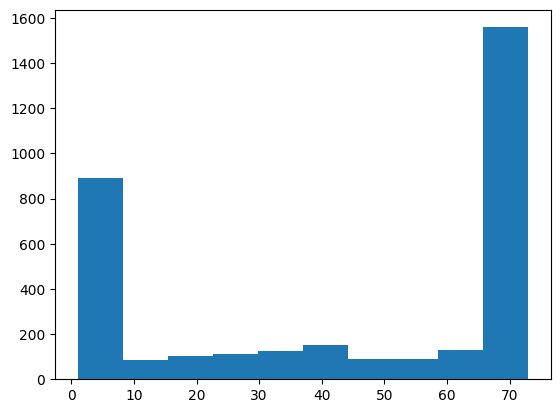

In [1016]:
line_lengths = [len(sentence) for sentence in alice]
h = plt.hist(line_lengths)

In [1017]:
tokens = [item.split() for item in alice]
print(tokens[:5])

[["[Alice's", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865]'], [], ['CHAPTER', 'I.', 'Down', 'the', 'Rabbit-Hole'], [], ['Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the']]


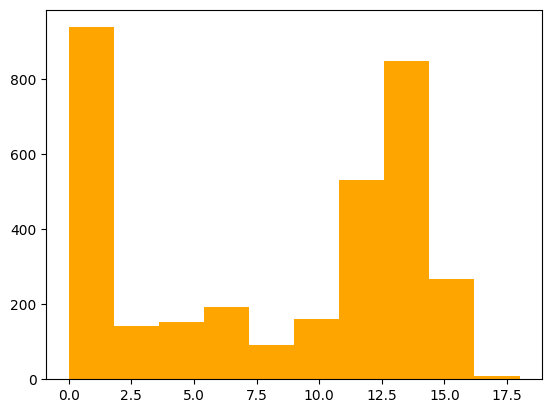

In [1018]:
total_tokens_per_line = [len(sentence.split()) for sentence in alice]
h = plt.hist(total_tokens_per_line, color='orange')

In [1019]:
words = [word for sentence in tokens for word in sentence]
print(words[:20])

["[Alice's", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865]', 'CHAPTER', 'I.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired']


In [1020]:
words = list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for word in words]))
print(words[:20])

['Alices', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', 'CHAPTER', 'I', 'Down', 'the', 'RabbitHole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of']


In [1021]:
from collections import Counter

words = [word.lower() for word in words]
c = Counter(words)
c.most_common(10)

[('the', 1629),
 ('and', 844),
 ('to', 721),
 ('a', 627),
 ('she', 537),
 ('it', 526),
 ('of', 508),
 ('said', 462),
 ('i', 400),
 ('alice', 385)]

In [1022]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
words = [word.lower() for word in words if word.lower() not in stopwords]
c = Counter(words)
c.most_common(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('said', 462),
 ('alice', 385),
 ('little', 128),
 ('one', 101),
 ('know', 86),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 77),
 ('thought', 74)]